# Figure 4

This figure shows the emergent constraint produced by each relationship from the last millennium. It shows them relative to the full ensemble and also to the original Cox et al. (2018) proposed constraint if it were calculated using the Bowman et al. (2018) method.

In [1]:
# import the necessary libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import linregress
from scipy.signal import detrend
import scipy.signal as signal
from statsmodels.api import tsa
import xarray as xr
import warnings
import zarr

# style guide for plots
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.size'] = 12

def compute_cox(x):
    x = x[~np.isnan(x)]
    psi_vals=[]
    for i in np.arange(0, len(x)-55):
        y = signal.detrend(x[i:i+55])
        auto_m1 = tsa.acf(y,nlags=1) # autocorrelation function from statsmodels
        auto_m1b = auto_m1[1]    # select 1 lag autocorrelation value
        sigma_m1= np.std(y)
        log_m1= np.log(auto_m1b)
        log_m1b = np.abs(log_m1)   # take absolute value
        sqrt_m1 = np.sqrt(log_m1b)
        psi = sigma_m1/sqrt_m1
        psi_vals.append(psi)
    return np.nanmean(psi_vals)

def compute_nijsse(x, length=10):
    # remove NaNs from the timeseries
    x = np.array(x)
    mask = ~np.isnan(x)
    x = x[mask]
    # fill it with slopes
    slopes = []
    i = 0
    while i < len(x)-length:
        slope, intercept, r, p, se = linregress(np.arange(0,length), x[i:i+length])
        slopes.append(length*slope)
        i+=length
    return np.nanstd(slopes)

In [2]:
from pathlib import Path
import os
notebooks_dir = Path(os.path.abspath('__file__')).parent.parent
data_dir = notebooks_dir.parent / 'data'


## Measured GMST Variability (PAGES 2k)

* Cox Metric ($\psi$): 0.0985K, 0.0201K

* Cox Metric ($\psi$): 0.0970K, 0.0202K (w/ volcano removal)

* Nijsse Metric ($\sigma_{b}$): 0.149K, 0.0346K

* Nijsse Metric ($\sigma_{b}$): 0.147K, 0.0343K (w/ volcano removal)

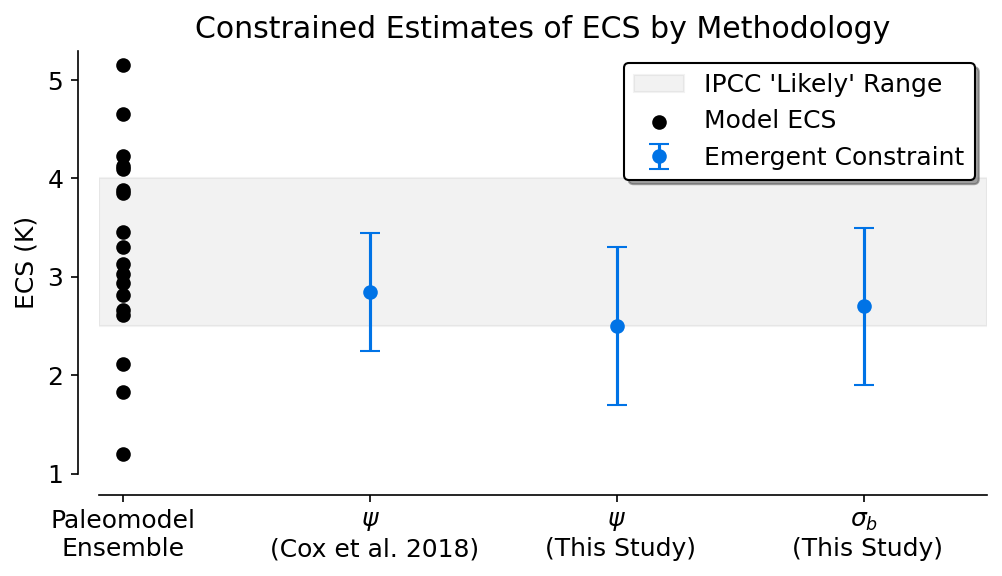

In [3]:
# define colors
constraint_color = '#0073E6'
ecs = pd.read_csv(data_dir/'ecs.csv')['ecs'].values

fig, ax = plt.subplots(figsize = (7, 4))
ax.set_ylim(1, 5.3)
ax.axhspan(2.5, 4.0, color = 'gray', alpha = 0.1, label = 'IPCC \'Likely\' Range')
ax.scatter(np.zeros(len(ecs)), ecs, color = 'black', label = 'Model ECS')
eb1 = ax.errorbar(1, y = 2.85, yerr = 0.6, capsize = 5, fmt = 'o', color = constraint_color, label = 'Emergent Constraint')
eb2 = ax.errorbar(2, y = 2.5, yerr = 0.8, capsize = 5, fmt = 'o', color = constraint_color)
eb3 = ax.errorbar(3, y = 2.7, yerr = 0.8, capsize = 5, fmt = 'o', color = constraint_color)
ax.set_xlim(-0.1, 3.5)
ax.set_xticks([0, 1, 2, 3,])
ax.set_xticklabels(['Paleomodel\nEnsemble', r'$\psi$'+'\n (Cox et al. 2018)', r'$\psi$'+'\n (This Study)', r'$\sigma_{b}$'+'\n (This Study)'])
ax.legend(framealpha=1, edgecolor='black', shadow=True)
ax.set_title('Constrained Estimates of ECS by Methodology')
ax.set_ylabel('ECS (K)')

# Move left and bottom spines outward by 10 points
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
# plt.savefig('figures/figure_4.png', dpi=3000, facecolor='w')